# Aashil Patel | aashil@aashilpatel.com

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pylab as pl
import plotly.plotly as py
%matplotlib inline

## Reading the data

In [2]:
articles = pd.read_csv("./data/articles.csv")
email_content = pd.read_csv("./data/email_content.csv")
topics = pd.read_csv("./data/topics.csv")
types = pd.read_csv("./data/types.csv")
users = pd.read_csv("./data/users.csv")
logs = pd.read_csv("./data/access.log", delim_whitespace=True)

## Brief look at the data

In [3]:
articles.head(2)
email_content.head(2)
topics.head(2)
types.head(2)
users.head(2)
logs.head(2)

,[02/Jan/2015:08:07:32],GET /click?article_id=162&user_id=5475 HTTP/1.1,200,4352
0,[02/Jan/2015:08:08:43],GET /click?article_id=139&user_id=19550 HTTP/1.1,200,3078
1,[02/Jan/2015:08:09:01],GET /click?article_id=87&user_id=9408 HTTP/1.1,200,2005


## Pre-processing the Access Log data

In [4]:
logs = logs.rename(columns={'[02/Jan/2015:08:07:32]' : 'timestamp',
                            'GET /click?article_id=162&user_id=5475 HTTP/1.1' : 'link',
                            '200': 'status_code',
                            '4352' : 'byte_size',
                           })
logs.insert(loc=1, column='article_id', value='')
logs.insert(loc=2, column='user_id', value='')
logs['link'] = logs['link'].apply(lambda x: x.strip('GET /click?'))
logs['link'] = logs['link'].apply(lambda x: x.strip('HTTP/1.1'))
logs['article_id'], logs['user_id'] = zip(*logs['link'].apply(lambda x: x.split('&')))
logs['article_id'] = logs['article_id'].apply(lambda x: x.strip('article_id='))
logs['user_id'] = logs['user_id'].apply(lambda x: x.strip('user_id='))
logs = logs.drop('link', 1)
logs.article_id = logs.article_id.astype(np.int64)
logs.user_id = logs.user_id.astype(np.int64)

In [5]:
logs.head(2)

,timestamp,article_id,user_id,status_code,byte_size
0,[02/Jan/2015:08:08:43],139,19550,200,3078
1,[02/Jan/2015:08:09:01],87,9408,200,2005


## Removing errorneous log data

In [6]:
a_id = logs.loc[logs['article_id'] <= 17029].groupby('article_id')['article_id'].count()

In [7]:
a_id.sort_values(inplace=True, ascending=False)

In [8]:
top_articles = []
for x in a_id:
    top_articles.append(a_id[a_id == x].index[0])

In [9]:
top_topics = []
top_types = []
top_authors = []

for x in top_articles:
    top_topics.append(articles[articles.article_id == x]['topic_id'].tolist()[0])
    top_types.append(articles[articles.article_id == x]['type_id'].tolist()[0])
    top_authors.append(articles[articles.article_id == x]['author_id'].tolist()[0])

In [10]:
top_articles = pd.Series(top_articles)
top_topics = pd.Series(top_topics)
top_types = pd.Series(top_types)
top_authors = pd.Series(top_authors)

In [11]:
top_topics = top_topics.value_counts()
top_types = top_types.value_counts()
top_authors = top_authors.value_counts()

In [12]:
top_10_articles = a_id.head(10)
top_10_topics = top_topics.head(10)
top_10_types = top_types.head(10)
top_10_authors = top_authors.head(10)

# Data Visualization

## Top 10 topics with highest clicks

In [13]:
for x in top_10_topics.iteritems():
    print topics[topics.topic_id == x[0]]['name'].tolist()[0]

Entrepreneurship
Growth Hacking
Web Marketing
Motivational
Economic History
Advertising
Leadership
Budgeting
Biography
Consumer Behavior


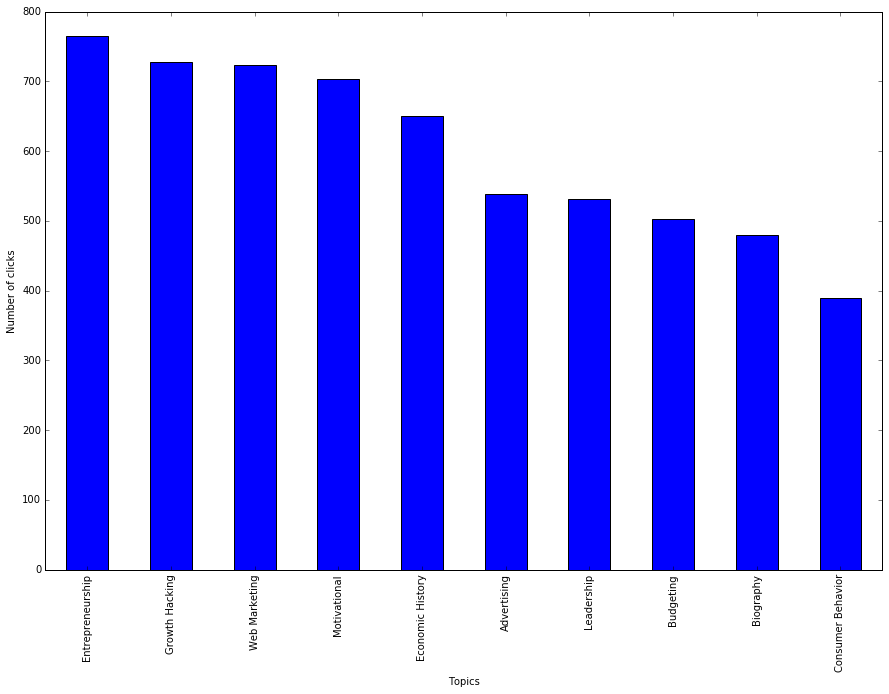

In [14]:
plt.figure(figsize=(15,10))
plot = top_10_topics.plot(kind='bar')
plot.set_xticklabels(["Entrepreneurship","Growth Hacking","Web Marketing","Motivational","Economic History","Advertising","Leadership",
                      "Budgeting","Biography","Consumer Behavior"])
plot.set_xlabel("Topics")
plot.set_ylabel("Number of clicks")

## Top 10 types of content with highest clicks

In [15]:
for x in top_10_types.iteritems():
    print types[types.type_id == x[0]]['name'].tolist()[0]

News
List
Summary
Blog Post
How-To
Podcast
White paper
Comment
Webinar
Data and Statistics


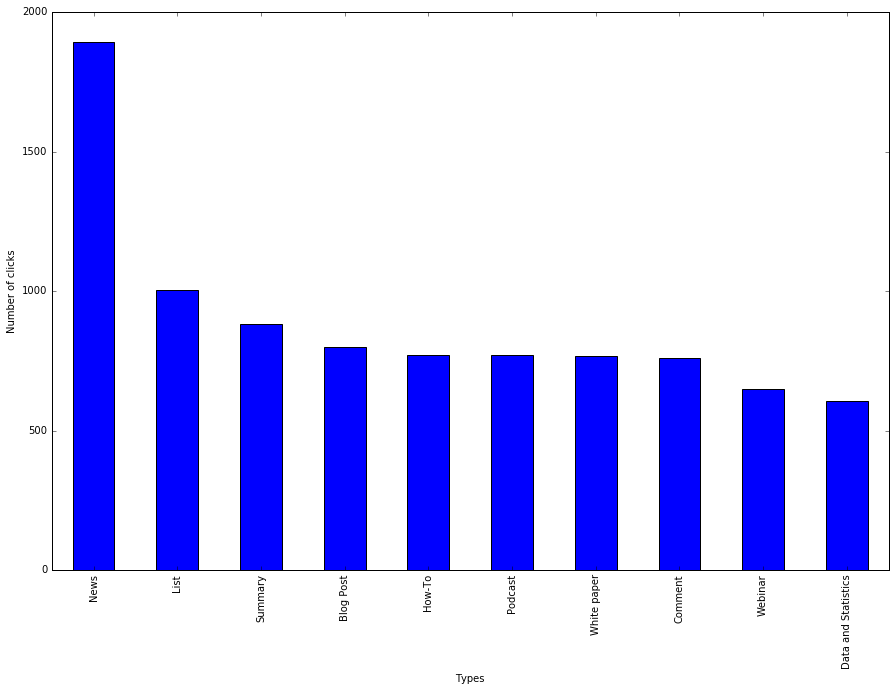

In [16]:
plt.figure(figsize=(15,10))
plot = top_10_types.plot(kind='bar')
plot.set_xticklabels(["News","List","Summary","Blog Post","How-To","Podcast","White paper","Comment","Webinar",
"Data and Statistics"])
plot.set_xlabel("Types")
plot.set_ylabel("Number of clicks")

## Top 10 users with most clickable contribution

In [17]:
for x in top_10_authors.iteritems():
    print users[users.user_id == x[0]]['email'].tolist()[0]

kevin.montez@icedh.com
dennis.hooker@fvrya.com
jason.williams@ygfbg.com
charlie.hansen@juzai.com
clifford.faust@xnoid.com
maximo.lindsey@eytkr.com
misty.labelle@crorv.com
kathryn.myers@qbmxo.com
rebecca.matthews@xdato.com
joseph.gallagher@phjue.com


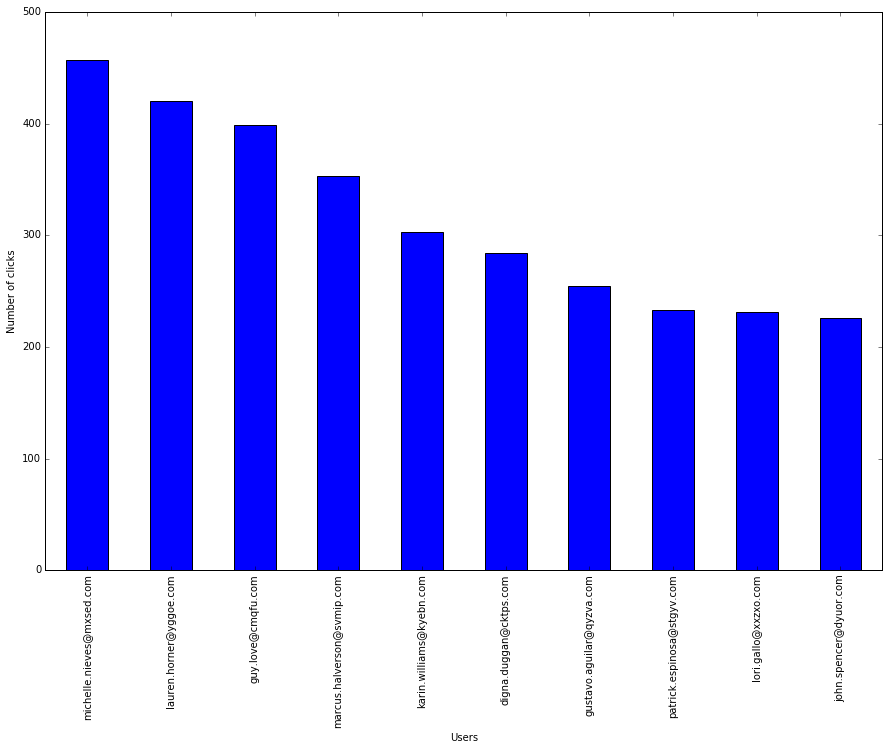

In [18]:
plt.figure(figsize=(15,10))
plot = top_10_authors.plot(kind='bar')
plot.set_xticklabels(["michelle.nieves@mxsed.com","lauren.horner@yggoe.com","guy.love@cmqfu.com",
"marcus.halverson@svmip.com","karin.williams@kyebn.com","digna.duggan@cktps.com","gustavo.aguilar@qyzva.com",
"patrick.espinosa@stgyv.com","lori.gallo@xxzxo.com","john.spencer@dyuor.com"
                     ])
plot.set_xlabel("Users")
plot.set_ylabel("Number of clicks")